In [1]:
from amadeusgpt.main import AMADEUS
from amadeusgpt.config import Config
import amadeusgpt
from pathlib import Path
import matplotlib.pyplot as plt
import cv2

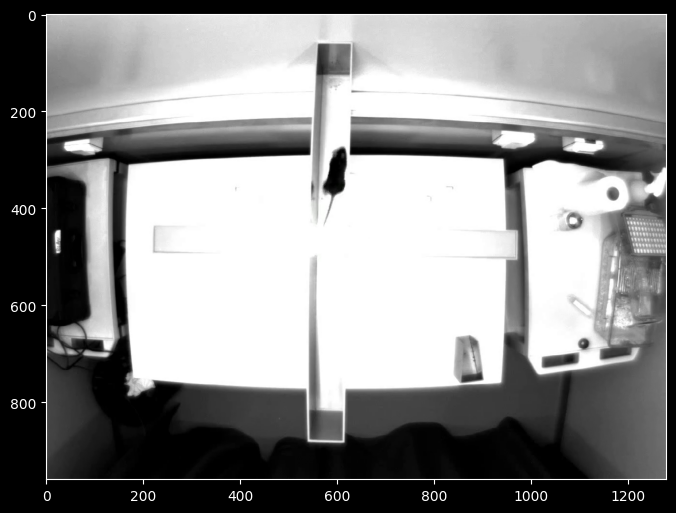

In [2]:
scene_frame_number = 400
amadeus_root = Path(amadeusgpt.__file__).parent.parent
config = Config(amadeus_root / "amadeusgpt/configs/EPM_template.yaml")
config['video_info']['scene_frame_number'] = scene_frame_number
config['keypoint_info']['keypoint_file_path'] = None 
video_path = "/mnt/md0/shaokai/AmadeusGPT-dev/examples/EPM/EPM_13_short.mp4"
config['video_info']['video_file_path'] = video_path


cap = cv2.VideoCapture(video_path)

# Check if video opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
else:
    # Set the frame position
    cap.set(cv2.CAP_PROP_POS_FRAMES, scene_frame_number)
    # Read the frame
    ret, image = cap.read()

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cap.release()
plt.imshow(image)
    

In [3]:
amadeus = AMADEUS(config)

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


current total cost 0.01 $
current total tokens 1049
The image shows a top-down view of a laboratory setting. There is a single mouse visible in the center of the image, walking on a narrow platform. The background includes various laboratory equipment and objects.

Here is the JSON string with the description:

```json
{
    "description": "Top-down view of a laboratory setting with a single mouse walking on a narrow platform. Various laboratory equipment and objects are visible in the background.",
    "individuals": 1,
    "species": "topview_mouse",
    "background_objects": ["laboratory equipment", "platform", "containers"]
}
```


In [4]:
from IPython.display import Markdown, display
def parse_result(amadeus, qa_message):
    display(Markdown(qa_message['chain_of_thought']))
    sandbox = amadeus.sandbox
    qa_message = sandbox.code_execution(qa_message)
    sandbox.render_qa_message(qa_message)
    print ('after executing the function')
    display(qa_message['meta_info'])
    print(qa_message['pose_video'])
    display(Markdown(str(qa_message['function_rets'])))

In [ ]:
query = "Plot the trajectory of the animal using the animal center and color it by time"
qa_message = amadeus.step(query)
parse_result(amadeus, qa_message)

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


current total cost 0.03 $
current total tokens 4004


To plot the trajectory of the animal using the animal center and color it by time, we need to follow these steps:

1. Retrieve the keypoints data, which includes the coordinates of the animal's body parts.
2. Extract the center keypoint data for the animal.
3. Plot the trajectory of the center keypoint over time.
4. Color the trajectory by time.

Given the core API functions, we can achieve this by using the `get_keypoints` function to get the keypoints data. We will then extract the center keypoint and plot its trajectory, coloring it by time.

Here is the function to achieve this:

```python
def plot_animal_trajectory(config: Config):
    """
    Plot the trajectory of the animal using the animal center and color it by time.

    Parameters:
    ----------
    config: Config
    """
    # Create an instance of AnimalBehaviorAnalysis
    analysis = create_analysis(config)
    
    # Get the keypoints data
    keypoints = analysis.get_keypoints()  # shape: (n_frames, n_individuals, n_kpts, n_dims)
    
    # Assuming the center keypoint is the first keypoint (index 0)
    center_keypoint = keypoints[:, :, 0, :]  # shape: (n_frames, n_individuals, n_dims)
    
    # Extract the x and y coordinates of the center keypoint for the first animal (index 0)
    x_coords = center_keypoint[:, 0, 0]  # shape: (n_frames,)
    y_coords = center_keypoint[:, 0, 1]  # shape: (n_frames,)
    
    # Create a time array
    time = np.arange(len(x_coords))
    
    # Plot the trajectory
    fig, ax = plt.subplots()
    scatter = ax.scatter(x_coords, y_coords, c=time, cmap='viridis')
    ax.invert_yaxis()  # Invert y axis to match image coordinates
    ax.set_xlim(0, 1280)
    ax.set_ylim(960, 0)
    ax.set_title('Animal Trajectory Colored by Time')
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    fig.colorbar(scatter, ax=ax, label='Time')
    
    return fig, ax
```

This function will plot the trajectory of the animal's center keypoint and color it by time. The x and y coordinates are extracted from the keypoints data, and the trajectory is plotted using a scatter plot with a color map representing time. The y-axis is inverted to match the image coordinates, and the plot limits are set to cover the entire image.

Loading DLC 3.0.0rc1...
DLC loaded in light mode; you cannot use any GUI (labeling, relabeling and standalone GUI)
going to inference video with superanimal_topviewmouse_hrnetw32
running video inference on ['/mnt/md0/shaokai/AmadeusGPT-dev/examples/EPM/EPM_13_short.mp4'] with superanimal_topviewmouse_hrnetw32
Using pytorch for model hrnetw32
using /mnt/md0/shaokai/AmadeusGPT-dev/examples/EPM/EPM_13_short.mp4 for video adaptation training
Task: None
scorer: None
date: None
multianimalproject: None
identity: None
project_path: /mnt/md0/shaokai/miniconda3/envs/amadeusgpt-gpu/lib/python3.10/site-packages/deeplabcut/modelzoo/project_configs
engine: pytorch
video_sets: None
bodyparts: ['nose', 'left_ear', 'right_ear', 'left_ear_tip', 'right_ear_tip', 'left_eye', 'right_eye', 'neck', 'mid_back', 'mouse_center', 'mid_backend', 'mid_backend2', 'mid_backend3', 'tail_base', 'tail1', 'tail2', 'tail3', 'tail4', 'tail5', 'left_shoulder', 'left_midside', 'left_hip', 'right_shoulder', 'right_midside',

 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 1418/1500 [02:30<00:08,  9.82it/s]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


current total cost 0.05 $
current total tokens 6850


To generate an occupancy plot using the animal center, we need to follow these steps:

1. Retrieve the keypoints data using the `get_keypoints()` method.
2. Extract the coordinates of the animal center keypoint (which is named 'mouse_center').
3. Create a 2D histogram or density plot to visualize the occupancy of the animal center over the frames.

Given the information provided, we can accurately answer the query using the available core APIs. Let's proceed to write the code.

Here is the function to generate the occupancy plot:

```python
def get_occupancy_plot(config: Config):
    """
    Generate an occupancy plot using the animal center keypoint.

    Parameters:
    ----------
    config: Config
        Configuration object for the analysis.
    
    Returns:
    -------
    tuple
        A tuple containing the figure and axes of the plot.
    """
    # Create an instance of AnimalBehaviorAnalysis
    analysis = create_analysis(config)
    
    # Retrieve keypoints data
    keypoints = analysis.get_keypoints()  # shape: (n_frames, n_individuals, n_kpts, n_dims)
    
    # Get the index of the 'mouse_center' keypoint
    keypoint_names = analysis.get_keypoint_names()
    mouse_center_index = keypoint_names.index('mouse_center')
    
    # Extract the coordinates of the 'mouse_center' keypoint
    mouse_center_coords = keypoints[:, :, mouse_center_index, :2]  # shape: (n_frames, n_individuals, 2)
    
    # Flatten the coordinates for all frames and individuals
    x_coords = mouse_center_coords[:, :, 0].flatten()
    y_coords = mouse_center_coords[:, :, 1].flatten()
    
    # Create the occupancy plot
    fig, ax = plt.subplots()
    ax.hist2d(x_coords, y_coords, bins=50, cmap='Blues')
    
    # Invert y-axis to match the image coordinate system
    ax.invert_yaxis()
    
    # Set plot limits to cover the whole image
    ax.set_xlim(0, 1280)
    ax.set_ylim(0, 960)
    
    ax.set_title('Occupancy Plot using Animal Center')
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    
    return fig, ax
```

This function will generate an occupancy plot using the coordinates of the 'mouse_center' keypoint for all frames and individuals. The plot will show the density of the animal center positions over time.

after executing the function


{'description': 'Top-down view of a laboratory setting with a single mouse walking on a narrow platform. Various laboratory equipment and objects are visible in the background.',
 'individuals': 1,
 'species': 'topview_mouse',
 'background_objects': ['laboratory equipment', 'platform', 'containers']}

None


(<Figure size 800x800 with 1 Axes>, <Axes: title={'center': 'Occupancy Plot using Animal Center'}, xlabel='X Coordinate', ylabel='Y Coordinate'>)

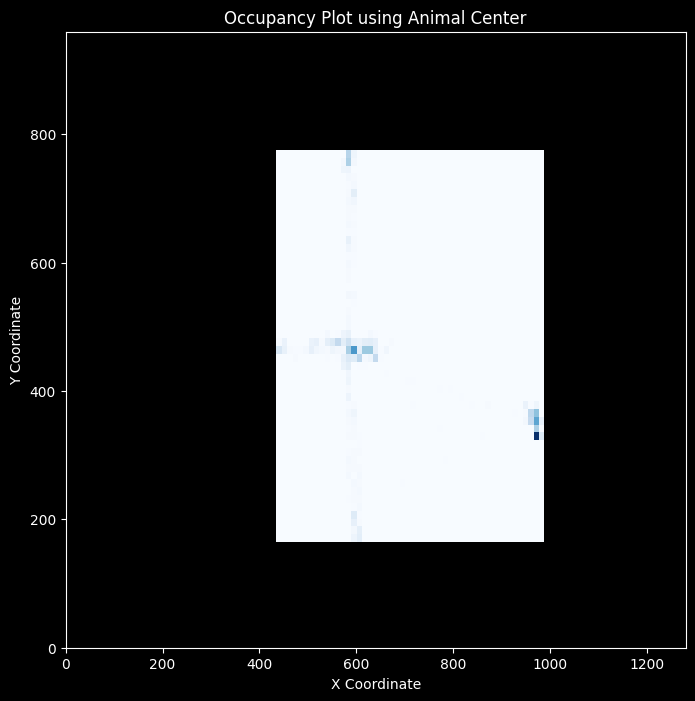

In [6]:
query = "give me the occupancy plot using the animal center"
qa_message = amadeus.step(query)
parse_result(amadeus, qa_message)